In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

import joblib
import streamlit as st
import cv2

In [2]:
final_model=joblib.load('svc_final_wholedataset.pkl')

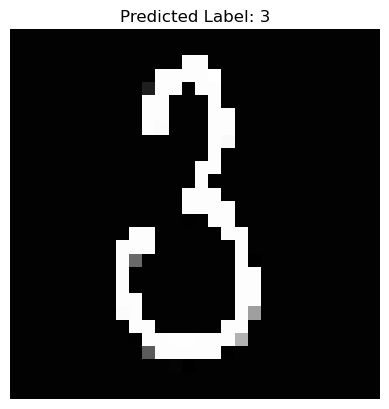

In [5]:
scaler = StandardScaler()
# Preprocess the image data
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
    # Invert colors
    inverted_img = 255 - img
    img_resized = cv2.resize(inverted_img, (28, 28))  # Resize the image to match MNIST dimensions
    blurred_img = cv2.GaussianBlur(img_resized, (3, 3), 4)
    img_flat = img_resized.flatten() / 255.0  # Flatten and normalize
    img_scaled = scaler.fit_transform(img_flat.reshape(-1, 1)).reshape(1, -1)
    return img_scaled, img_resized
# Predict function
def predict_image(image_path):
    img_preprocessed, _ = preprocess_image(image_path)
    prediction = final_model.predict(img_preprocessed)
    return prediction

# Example usage:
image_path = "3 edited.jpg"  # Replace with the path to your image file
prediction = predict_image(image_path)

# Display the preprocessed image and prediction
img_preprocessed, _ = preprocess_image(image_path)  # Get the preprocessed image
plt.imshow(img_preprocessed.reshape(28, 28), cmap='gray')  # Reshape to 28x28 for display
plt.title(f"Predicted Label: {prediction[0]}")
plt.axis('off')
plt.show()